This notebook is used to analyze the data and do some basic preprocessing.

DONE: some analysis

**TODO**: preprocessing (not necessary for BERT finetuning though!)
- all lowercase
- remove tags @
- remove hashtags (?)
- remove puntuation
- remove stopwords
- expand contractions (pycontractions)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import seaborn as sns
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("data/train_tweets/ArgentinaBelgium72.csv")
df.head()

,ID,MatchID,PeriodID,EventType,Timestamp,Tweet
0,11_0,11,0,0,1404575400000,RT @2014WorIdCup: Argentina vs Belgium\n\nWho ...
1,11_0,11,0,0,1404575400000,@elijahman_ time to focus on Belgium winning t...
2,11_0,11,0,0,1404575400000,RT @FIFAWorldCup: GLOBAL STADIUM: #Joinin with...
3,11_0,11,0,0,1404575400000,RT @CatholicNewsSvc: #PopeFrancis. Uh-oh. Arge...
4,11_0,11,0,0,1404575400000,RT @soccerdotcom: If he scores vs #BEL we'll a...


From the dataset dictionary in the Kaggle group the columns are described as follows:
- ID: An identifier which is the combination of the following two IDs
- MatchID: An identifier for each football match.
- PeriodID: An identifier for the time period within the match. Each period is 1 minute long.
- EventType: A binary label indicating the presence (1) or absence (0) of a sub-event in the given time period.
- Timestamp: A Unix timestamp indicating when the tweet was posted.
- Tweet: The text content of the tweet.

In [3]:
df.shape, df.dtypes

((313803, 6),
 ID           object
 MatchID       int64
 PeriodID      int64
 EventType     int64
 Timestamp     int64
 Tweet        object
 dtype: object)

In [4]:
df.describe()

,MatchID,PeriodID,EventType,Timestamp
count,313803.0,313803.000000,313803.000000,3.138030e+05
mean,11.0,64.579985,0.608213,1.404579e+12
std,0.0,37.962749,0.488150,2.277785e+06
min,11.0,0.000000,0.000000,1.404575e+12
25%,11.0,31.000000,0.000000,1.404577e+12
50%,11.0,63.000000,1.000000,1.404579e+12
75%,11.0,99.000000,1.000000,1.404581e+12
max,11.0,129.000000,1.000000,1.404583e+12


In [5]:
for col in ["MatchID", "PeriodID", "EventType"]:
    print(f"{col} unique values: {df[col].unique()}")

MatchID unique values: [11]
PeriodID unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129]
EventType unique values: [0 1]


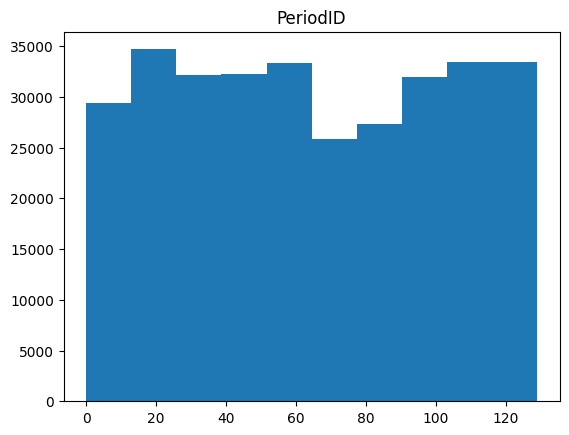

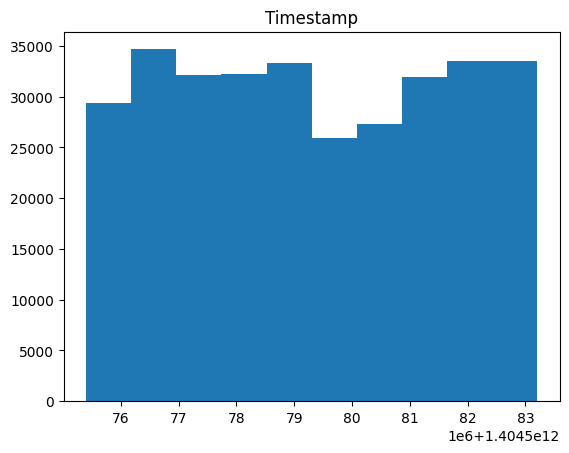

In [6]:
for col in ["PeriodID", "Timestamp"]:
    plt.hist(df[col])
    plt.title(f"{col}")
    plt.show()

In [7]:
df["PeriodID"].corr(df["Timestamp"])

0.9999709733809615

It seems like the two variables are linearly dependent, so maybe we could remove one.

Let's look at the type of tweets.

In [8]:
for i in range(10):
    print(df["Tweet"][i])

RT @2014WorIdCup: Argentina vs Belgium

Who wins? | http://t.co/leuWTBZ1YY
@elijahman_ time to focus on Belgium winning the World Cup 🔴🌕⚫️
RT @FIFAWorldCup: GLOBAL STADIUM: #Joinin with our #WorldCup coverage of #ARGBEL from Brasilia #ARG #BEL - http://t.co/vL9aX7XMvh http://t.…
RT @CatholicNewsSvc: #PopeFrancis. Uh-oh. Argentina vs Belgium in 30 mins. We're gonna miss it. http://t.co/Sj2Fnzmvrb
RT @soccerdotcom: If he scores vs #BEL we'll award a Messi-signed @brazuca to one lucky winner! Follow & RT to enter. #allin or nothing htt…
RT @soccerdotcom: If he scores vs #BEL we'll award a Messi-signed @brazuca to one lucky winner! Follow & RT to enter. #allin or nothing htt…
I just hope Argentina lose. Would be fun to see Belgium go forward. As much as I want Leo to win the World Cup, want Belgium to qualify.
Watch Argentina vs Belgium 5th July 2014 LIVE Go this link :- http://t.co/FpKI7U4s0h http://t.co/FpKI7U4s0h
sdsd
@JRMun0z why dont you like Argentina.
Even though I hate Belgium for 

We have several properties to consider in the preprocessing: 
- RT for retweets
- links
- emojis,
- hashtags
- tags

In [9]:
df[df["Tweet"].str.contains("RT")].shape[0] / df.shape[0] # retweets

0.476461346768514

In [10]:
df[df["Tweet"].duplicated()].shape[0] / df.shape[0] # duplicates

0.4041962632607082

In [11]:
df[df["Tweet"].duplicated()][df["Tweet"].str.contains("RT")].shape[0] / df.shape[0] # of the duplicates how many are retweets

C:\Users\sandr\AppData\Local\Temp\ipykernel_50732\2097233941.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Tweet"].duplicated()][df["Tweet"].str.contains("RT")].shape[0] / df.shape[0] # of the duplicates how many are retweets


0.38794721529112214

40% of our datasets contains duplicates.

Let's look at some other statistics of the data.

In [ ]:
df["Tweet"].str.len().max() # max number of words (useful for tokenization max length with BERT)

140

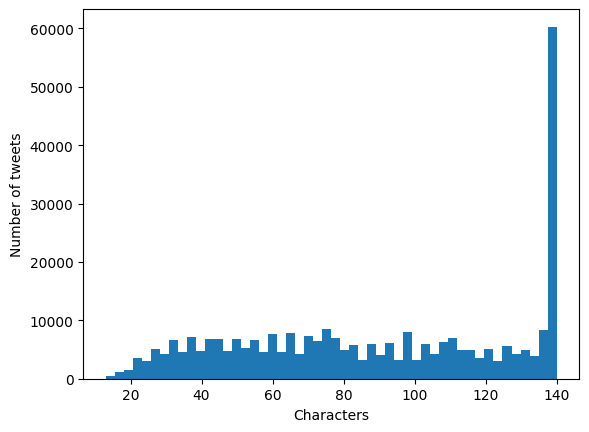

In [12]:
plt.hist(df["Tweet"].str.len(), bins=50)
plt.xlabel("Characters")
plt.ylabel("Number of tweets")
plt.show()

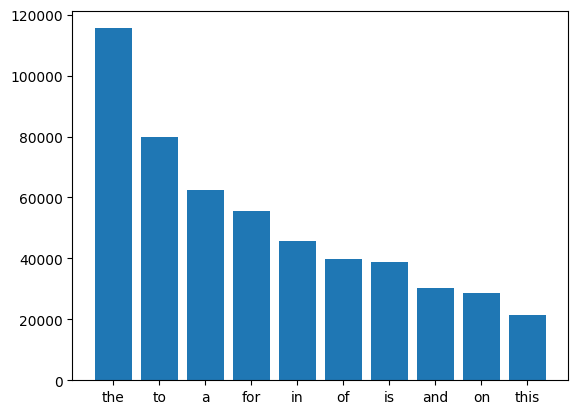

In [13]:
stop_words = set(stopwords.words("english"))
tweet_list = df["Tweet"].str.split().values.tolist()
corpus = [word for l in tweet_list for word in l]
dict = defaultdict(int)
for word in corpus:
    if word in stop_words:
        dict[word] += 1
top=sorted(dict.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)
plt.show()

In [37]:
unique_words = set(corpus)
print(f"Total number of words: {len(corpus)}\nNumber of unique words: {len(unique_words)} ({(len(unique_words) / len(corpus))*100} %)")

Total number of words: 4349878
Number of unique words: 187782 (4.3169486592497535 %)


<Axes: >

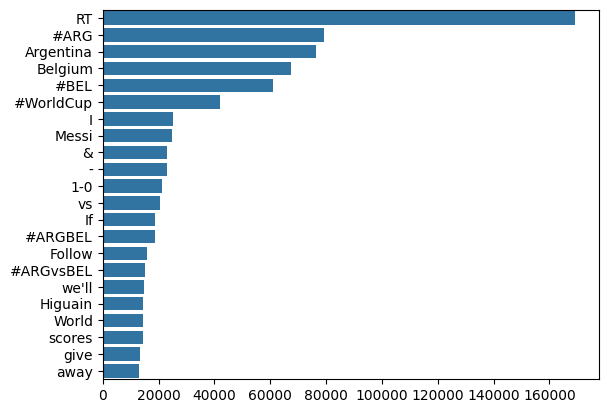

In [15]:
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

Of course most terms are related to the teams and players. 
We could also think about removing "vs"?